In [1]:
from cobra.io import load_model, load_json_model

In [2]:
# Contains the main steps of the BayesOpt
%run BayesOpt_MOBO_II.ipynb

In [82]:
# Plotting functions to be used across notebooks
%run Plotting_MOBO_II.ipynb

In [6]:
# imports for .py version
#from Plotting_MOBO_II import *
#from BayesOpt_MOBO_II import *
#from HelperFunctions_MOBO_II import *

# Models & Media

## Load & Define

### Models

In [4]:
# load textbook
model_textbook = load_model("textbook")
medium_textbook = model_textbook.medium
print(model_textbook)

# load iML1515
model_iML1515 = load_model("iML1515")
medium_iML1515 = model_iML1515.medium
print(model_iML1515)

# load modified iJO1366
model_iJO1366_antiEpEX_scFv = load_json_model("..//Models//iJO1366_producing_antiEpEX-scFv.json")
# on Server
#model_iJO1366_antiEpEX_scFv = load_json_model("iJO1366_producing_antiEpEX-scFv.json")
medium_iJO1366 = model_iJO1366_antiEpEX_scFv.medium
print(model_iJO1366_antiEpEX_scFv)

e_coli_core
iML1515
iJO1366_producing_antiEpEX-scFv


### Media

In [5]:
"""
Cost of EX_nh4_e should be 3.6748, not 10.099587. There was an error in my database
"""

# textbook
bounds_textbook = {
    'EX_co2_e': (0.0, 10), # not in medium_iJO1366_enriched
    'EX_glc__D_e': (1, 10), 
    'EX_h_e': (0.0, 10), # not in medium_iJO1366_enriched
    'EX_h2o_e': (0.0, 10), # not in medium_iJO1366_enriched
    'EX_nh4_e': (0.0, 10),
    'EX_o2_e': (0.0, 20),
    'EX_pi_e': (0.0, 50)
}
costs_textbook = {
    'EX_co2_e': 0.00, # CO2 - undetermined costs
    'EX_glc__D_e': 7.76, # Glucose
    'EX_h_e': 0.00, # Hydrogen - undetermined costs
    'EX_h2o_e': 0.00, # water - undetermined costs
    'EX_nh4_e': 10.1, # Ammonia - NH4Cl
    'EX_o2_e': 0.00, # oxygen - undetermined costs
    'EX_pi_e': 23.4234, # Phosphate - approximate (several sources)
}

# true M9
medium_M9 = {
    'EX_nh4_e': 9.3475, # Ammonia
    'EX_ca2_e': 0.05, # Calcium
    'EX_glc__D_e': 10, # Carbon - Glucose
    'EX_cl_e': 13.6755, # Chloride - sum of NaCl, NH4Cl and CaCl2
    'EX_mg2_e': 1, # Magnesium
    'EX_pi_e': 34.90, # Phosphate - sum of KH2PO4 and Na2HPO4
    'EX_k_e': 11.02, # Potassium
    'EX_na1_e': 0, #52.038, # Sodium - sum of NaCl and Na2HPO4
    'EX_so4_e': 1, # Sulfate
    'EX_co2_e': 0.0, # Carbon Dioxide - provided by the "atmosphere"
    'EX_h_e': 0.0, # Hydrogen (from CO2 dissolving in water?)
    'EX_h2o_e': 0.0, # Water - solvent
    'EX_o2_e': 20.0, # Oxygen - provided by the "atmosphere"
}
bounds_M9 = {
    'EX_nh4_e': (0.0, 10),
    'EX_ca2_e': (0.0, 10),
    'EX_glc__D_e': (1.0, 10),
    'EX_cl_e': (0.0, 20),
    'EX_mg2_e': (0.0, 10),
    'EX_pi_e': (0.0, 50),
    'EX_k_e': (0.0, 20),
    'EX_na1_e': (0.0, 0.0), # fix - can be set to 0
    'EX_so4_e': (0.0, 10),
    'EX_co2_e': (0.0, 0.0), # 
    'EX_h2_e': (0.0, 0.0), # 
    'EX_h2o_e': (0.0, 0.0), # 
    'EX_o2_e': (0, 20), # fix - can't be set to 10 or lower
}
# costs are in £/mol
costs_M9 = {
    'EX_nh4_e': 10.099587, # Ammonia - as NH4Cl - approximate (several sources and "side-effect"
    'EX_ca2_e': 18.08223, # Calcium - as CaCl2·2H2O
    'EX_glc__D_e': 7.7647236, # Glucose
    'EX_cl_e': 3.03888, # Chlorid - as NaCl, NH4Cl, CaCl2 - approximate price from NaCl
    'EX_mg2_e': 19.1022, # Magnesium - as MgSO4·7H2O - approximate bc. half of 38.2044
    'EX_pi_e': 23.4234, # Phosphate - approximate (several sources)
    'EX_k_e': 20.82177, # Potassium - as KCl - approximate (several sources and "side-effect"
    'EX_na1_e': 0.0, # Sodium - as NaCl, Na2HPO4
    'EX_so4_e': 19.1022, # Sulfate - as MgSO4·7H2O - approximate bc. half of 38.2044
    'EX_o2_e': 0.0, # oxygen - no costs    
}

# M9 with essential trace metals
medium_iJO1366_reduced = {
    'EX_pi_e': 34.90, # in M9
    'EX_mn2_e': 0.001, # - required?; drops at 0.0001
    'EX_fe2_e': 0.1, # - required?; drops at 0.01
    'EX_glc__D_e': 10.0, # in M9
    'EX_zn2_e': 0.001, # - required?; drops at 0.0001
    'EX_mg2_e': 1.0, # in M9 
    'EX_ca2_e': 0.05, # in M9
    'EX_ni2_e': 0.001, # - required?; drops at 0.0001
    'EX_cu2_e': 0.001, # - required?; drops at 0.0001
    'EX_cobalt2_e': 0.0001, # - required; drops at 0.00001 
    'EX_mobd_e': 0.0005, # - required?; drops at 0.000001
    'EX_so4_e': 1.0, # in M9
    'EX_nh4_e': 9.3475, # in M9
    'EX_k_e': 11.02, # in M9
    'EX_na1_e': 52.038, # in M9
    'EX_cl_e': 13.6755, # in M9
    'EX_o2_e': 20.0, # in M9 II - drops at 10
}
bounds_iJO1366_reduced = {
    'EX_pi_e': (0.0, 50),
    'EX_mn2_e': (0.001, 0.001), # fix "trace" 
    'EX_fe2_e': (0.1, 0.1), # fix "trace"
    'EX_glc__D_e': (1.0, 10),
    'EX_zn2_e': (0.001, 0.001), # fix "trace"
    'EX_mg2_e': (0.0, 10),
    'EX_ca2_e': (0.0, 10),
    'EX_ni2_e': (0.001, 0.001), # fix "trace"
    'EX_cu2_e': (0.001, 0.001), # fix "trace"
    'EX_cobalt2_e': (0.0001, 0.0001), # fix "trace"
    'EX_mobd_e': (0.0005, 0.0005), # fix "trace"
    'EX_so4_e': (0.0, 10),
    'EX_nh4_e': (0.0, 10),
    'EX_k_e': (0.0, 20),
    'EX_na1_e': (0.0, 100.0), # fix - can be set to 0
    'EX_cl_e': (0.0, 20),
    'EX_o2_e': (0, 20), # fix - can't be set to 10 or lower
}
# costs are in £/mol
costs_iJO1366_reduced = {
    'EX_pi_e': 23.4234, # Phosphate - approximate (several sources)
    'EX_mn2_e': 0.0, #33.25, # Manganese - MnCl2·4H20
    'EX_fe2_e': 0.0, #37.5, # IronII - as iron sulfate FeSO4·7H2O
    'EX_glc__D_e': 7.7647236, # Glucose
    'EX_zn2_e': 0.0, #28.3, # Zinc - as Zn(CH3CHOOH)·H2O
    'EX_mg2_e': 19.1022, # Magnesium - as MgSO4·7H2O - approximate bc. half of 38.2044
    'EX_ca2_e': 18.08223, # Calcium - as CaCl2·2H2O
    'EX_ni2_e': 0.0, #53.24, # Nickel - as NiCl2·6H2O
    'EX_cu2_e': 0.0, #31.37, # Copper - CuCl2·2H2O
    'EX_cobalt2_e': 0.0, #114.39, # Cobalt - as CoCl2·6H2O
    'EX_mobd_e': 0.0, #184.12, # Molybdenum - molybdate NaMoO4·2H2O
    'EX_so4_e': 19.1022, # Sulfate - as MgSO4·7H2O - approximate bc. half of 38.2044
    'EX_nh4_e': 10.099587, # Ammonia - as NH4Cl - approximate (several sources and "side-effect"
    'EX_k_e': 20.82177, # Potassium - as KCl - approximate (several sources and "side-effect"
    'EX_na1_e': 0.0, # Sodium - as NaCl, Na2HPO4
    'EX_cl_e': 3.03888, # Chlorid - as NaCl, NH4Cl, CaCl2 - approximate price from NaCl
    'EX_o2_e': 0.0, # oxygen - no costs
}

# M9 with essential trace metals and amino acids
"""
The optimum concentrations of glutamine, arginine and asparagine suggested 
by the models to achieve maximum antiEpEX-scFv levels with high solubility 
were 9.9, 9.5 and 6.1 mM respectively.

Using the same arguments as for the conversion of Molar to flux bounds,
they sit at 4.95, 4.75, 3.05. -> set as default and change bounds accordingly
"""
medium_iJO1366_enriched = {
    'EX_pi_e': 34.90, # in M9
    'EX_mn2_e': 0.001, # - required?; drops at 0.0001
    'EX_fe2_e': 0.1, # - required?; drops at 0.01
    'EX_glc__D_e': 10.0, # in M9
    'EX_zn2_e': 0.001, # - required?; drops at 0.0001
    'EX_mg2_e': 1.0, # in M9 
    'EX_ca2_e': 0.05, # in M9
    'EX_ni2_e': 0.001, # - required?; drops at 0.0001
    'EX_cu2_e': 0.001, # - required?; drops at 0.0001
    'EX_cobalt2_e': 0.0001, # - required; drops at 0.00001 
    'EX_mobd_e': 0.0005, # - required?; drops at 0.0001 - higher than for iML1515
    'EX_so4_e': 1.0, # in M9
    'EX_nh4_e': 9.3475, # in M9 # lower than with 10
    'EX_k_e': 11.02, # in M9
    'EX_na1_e': 52.038, # in M9
    'EX_cl_e': 13.6755, # in M9
    'EX_o2_e': 20.0, # in M9 II - drops at 10
    'EX_arg__L_e': 4.75, # L-Arginine
    'EX_asn__L_e': 3.05, # L-Asparagine
    'EX_gln__L_e' : 4.95 # L-Glutamine
}
bounds_iJO1366_enriched = {
    'EX_pi_e': (0.0, 50),
    'EX_mn2_e': (0.001, 0.001), # fixed "trace" 
    'EX_fe2_e': (0.1, 0.1), # fixed "trace"
    'EX_glc__D_e': (1.0, 10),
    'EX_zn2_e': (0.001, 0.001), # fixed "trace"
    'EX_mg2_e': (0.0, 10),
    'EX_ca2_e': (0.0, 10),
    'EX_ni2_e': (0.001, 0.001), # fixed "trace"
    'EX_cu2_e': (0.001, 0.001), # fixed "trace"
    'EX_cobalt2_e': (0.0001, 0.0001), # fixed "trace"
    'EX_mobd_e': (0.0005, 0.0005), # fixed "trace"
    'EX_so4_e': (0.0, 10),
    'EX_nh4_e': (0.0, 10), # close to the default of 9.3475
    'EX_k_e': (0.0, 20),
    'EX_na1_e': (0.0, 100.0), # if fixed - can be set to 0
    'EX_cl_e': (0.0, 20),
    'EX_o2_e': (0, 20), # if fixed - can't be set to 10 or lower
    'EX_arg__L_e': (0.0, 10.0), # L-Arginine
    'EX_asn__L_e': (0.0, 10.0), # L-Asparagine
    'EX_gln__L_e' : (0.0, 10.0) # L-Glutamine
}
# costs are in £/mol
costs_iJO1366_enriched = {
    'EX_pi_e': 23.4234, # Phosphate - approximate (several sources)
    'EX_mn2_e': 0.0, #33.25, # Manganese - MnCl2·4H20
    'EX_fe2_e': 0.0, #37.5, # IronII - as iron sulfate FeSO4·7H2O
    'EX_glc__D_e': 7.7647236, # Glucose
    'EX_zn2_e': 0.0, #28.3, # Zinc - as Zn(CH3CHOOH)·H2O
    'EX_mg2_e': 19.1022, # Magnesium - as MgSO4·7H2O - approximate bc. half of 38.2044
    'EX_ca2_e': 18.08223, # Calcium - as CaCl2·2H2O
    'EX_ni2_e': 0.0, #53.24, # Nickel - as NiCl2·6H2O
    'EX_cu2_e': 0.0, #31.37, # Copper - CuCl2·2H2O
    'EX_cobalt2_e': 0.0, #114.39, # Cobalt - as CoCl2·6H2O
    'EX_mobd_e': 0.0, #184.12, # Molybdenum - molybdate NaMoO4·2H2O
    'EX_so4_e': 19.1022, # Sulfate - as MgSO4·7H2O - approximate bc. half of 38.2044
    'EX_nh4_e': 10.099587, # Ammonia - as NH4Cl - approximate (several sources and "side-effect"
    'EX_k_e': 20.82177, # Potassium - as KCl - approximate (several sources and "side-effect"
    'EX_na1_e': 0.0, # Sodium - as NaCl, Na2HPO4
    'EX_cl_e': 3.03888, # Chlorid - as NaCl, NH4Cl, CaCl2 - approximate price from NaCl
    'EX_o2_e': 0.0, # oxygen - no costs
    'EX_arg__L_e': 61.1442, # L-Arginine
    'EX_asn__L_e': 93.01248, # L-Asparagine
    'EX_gln__L_e' : 80.23086 # L-Glutamine
}

# iJO1366 default with aas
medium_iJO1366_aa = {
    'EX_ca2_e': 1000.0,
    'EX_cbl1_e': 0.01,
    'EX_cl_e': 1000.0,
    'EX_co2_e': 1000.0,
    'EX_cobalt2_e': 1000.0,
    'EX_cu2_e': 1000.0,
    'EX_fe2_e': 1000.0,
    'EX_fe3_e': 1000.0,
    'EX_glc__D_e': 10.0,
    'EX_h_e': 1000.0,
    'EX_h2o_e': 1000.0,
    'EX_k_e': 1000.0,
    'EX_mg2_e': 1000.0,
    'EX_mn2_e': 1000.0,
    'EX_mobd_e': 1000.0,
    'EX_na1_e': 1000.0,
    'EX_nh4_e': 1000.0,
    'EX_ni2_e': 1000.0,
    'EX_o2_e': 20.0,
    'EX_pi_e': 1000.0,
    'EX_sel_e': 1000.0,
    'EX_slnt_e': 1000.0,
    'EX_so4_e': 1000.0,
    'EX_tungs_e': 1000.0,
    'EX_zn2_e': 1000.0,
    'EX_arg__L_e': 4.75, # L-Arginine
    'EX_asn__L_e': 3.05, # L-Asparagine
    'EX_gln__L_e' : 4.95 # L-Glutamine
    }
# iJO1366 default with aas and without sulfate
medium_iJO1366_production = {
    'EX_pi_e': 34.90, # in M9
    'EX_mn2_e': 0.001, # - required?; drops at 0.0001
    'EX_fe2_e': 0.1, # - required?; drops at 0.01
    'EX_glc__D_e': 10.0, # in M9
    'EX_zn2_e': 0.001, # - required?; drops at 0.0001
    'EX_mg2_e': 1.0, # in M9 
    'EX_ca2_e': 0.05, # in M9
    'EX_ni2_e': 0.001, # - required?; drops at 0.0001
    'EX_cu2_e': 0.001, # - required?; drops at 0.0001
    'EX_cobalt2_e': 0.0001, # - required; drops at 0.00001 
    'EX_mobd_e': 0.0005, # - required?; drops at 0.0001 - higher than for iML1515
    'EX_so4_e': 0.000, # in M9
    'EX_nh4_e': 9.3475, # in M9 # lower than with 10
    'EX_k_e': 11.02, # in M9
    'EX_na1_e': 52.038, # in M9
    'EX_cl_e': 13.6755, # in M9
    'EX_o2_e': 20.0, # in M9 II - drops at 10
    'EX_arg__L_e': 4.75, # L-Arginine
    'EX_asn__L_e': 3.05, # L-Asparagine
    'EX_gln__L_e' : 4.95 # L-Glutamine
}


## Explore

In [6]:
print("Model objective:\n", model_iJO1366_antiEpEX_scFv.objective)
# assign enriched medium to model
model_iJO1366_antiEpEX_scFv.medium = medium_iJO1366_enriched
# run optimisation
solution = model_iJO1366_antiEpEX_scFv.optimize()
# print relevant fluxes of optimised flux distribution
print("Biomass flux:\t\t\t\t", solution.fluxes["BIOMASS_Ec_iJO1366_core_53p95M"])
print("Recombinant protein prduction flux:\t", solution.fluxes["Recombinant_protein"])

Model objective:
 Maximize
1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
Biomass flux:				 1.3464608513223193
Recombinant protein prduction flux:	 0.0


In [7]:
### Change objective to a mix of growth and protein expression
"""
Argument: The Ampicillin resistance is also expressed and required
"""
protein_rxn = model_iJO1366_antiEpEX_scFv.reactions.get_by_id("Recombinant_protein")
biomass_rxn = model_iJO1366_antiEpEX_scFv.reactions.get_by_id("BIOMASS_Ec_iJO1366_core_53p95M")
biomass_rxn_bounds = biomass_rxn.bounds # default bounds of (0, 1000)
# limit growth rate to 0.85
biomass_rxn.bounds = (0.0, 0.85)
"""
glucose_rxn = model_iJO1366_antiEpEX_scFv.reactions.get_by_id("EX_glc__D_e")
glucose_rxn.bounds = (-10, 1000) # (-10, -10)# force glucose uptake
"""
# create combined objective
factor_bio = 0.99 # when set to 1, only biomass production is optimised, when smaller, protein production included
factor_prot = 1 - factor_bio
combined_objective = model_iJO1366_antiEpEX_scFv.problem.Objective(
    factor_bio * model_iJO1366_antiEpEX_scFv.reactions.BIOMASS_Ec_iJO1366_core_53p95M.flux_expression + 
    factor_prot * model_iJO1366_antiEpEX_scFv.reactions.Recombinant_protein.flux_expression,
    direction = 'max')

model_iJO1366_antiEpEX_scFv.objective = combined_objective
print("Objective:\n", model_iJO1366_antiEpEX_scFv.objective)

# test performance of different growth media
model_iJO1366_antiEpEX_scFv.medium = medium_iJO1366_reduced
solution = model_iJO1366_antiEpEX_scFv.optimize()
print("\nM9 medium with trace metals:", 
      "\nBiomass flux:\t\t", solution.fluxes["BIOMASS_Ec_iJO1366_core_53p95M"], 
      "\nProduction flux:\t", solution.fluxes["Recombinant_protein"])

model_iJO1366_antiEpEX_scFv.medium = medium_iJO1366_enriched
solution = model_iJO1366_antiEpEX_scFv.optimize()
print("\nM9 medium + optimal amino acid",
      "\nBiomass flux:\t\t", solution.fluxes["BIOMASS_Ec_iJO1366_core_53p95M"],
      "\nProduction flux:\t", solution.fluxes["Recombinant_protein"])

model_iJO1366_antiEpEX_scFv.medium = medium_iJO1366_aa
solution = model_iJO1366_antiEpEX_scFv.optimize()
print("\niJO1366 default medium + optimal amino acid",
      "\nBiomass flux:\t\t", solution.fluxes["BIOMASS_Ec_iJO1366_core_53p95M"],
      "\nProduction flux:\t", solution.fluxes["Recombinant_protein"])
# not the same when factor_bio changes from 1
print("Slim optimise:\t\t", model_iJO1366_antiEpEX_scFv.slim_optimize())

model_iJO1366_antiEpEX_scFv.medium = medium_iJO1366_production
solution = model_iJO1366_antiEpEX_scFv.optimize()
print("\niJO1366 M9 medium +optimal amino acid -sulfate",
      "\nBiomass flux:\t\t", solution.fluxes["BIOMASS_Ec_iJO1366_core_53p95M"],
      "\nProduction flux:\t", solution.fluxes["Recombinant_protein"])

model_iJO1366_antiEpEX_scFv.medium = medium_iJO1366
solution = model_iJO1366_antiEpEX_scFv.optimize()
print("\niJO1366 default medium",
      "\nBiomass flux:\t\t", solution.fluxes["BIOMASS_Ec_iJO1366_core_53p95M"],
      "\nProduction flux:\t", solution.fluxes["Recombinant_protein"])

Objective:
 Maximize
0.99*BIOMASS_Ec_iJO1366_core_53p95M - 0.99*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1 + 0.01*Recombinant_protein - 0.01*Recombinant_protein_reverse_7ae2f

M9 medium with trace metals: 
Biomass flux:		 0.8449502556471631 
Production flux:	 0.0

M9 medium + optimal amino acid 
Biomass flux:		 0.85 
Production flux:	 0.021073837077251627

iJO1366 default medium + optimal amino acid 
Biomass flux:		 0.85 
Production flux:	 0.02107561163885834
Slim optimise:		 0.8417107561163886

iJO1366 M9 medium +optimal amino acid -sulfate 
Biomass flux:		 0.0 
Production flux:	 0.0

iJO1366 default medium 
Biomass flux:		 0.85 
Production flux:	 0.004155178801587458


# Running the Optimisation(s)

## Textbook

In [16]:
print(model_textbook.objective)

Maximize
1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba


In [ ]:
# set n_iter and date to be used in all calls and names
date = "2025-04-07"
rounds = 1 # how often should the algorithm run
n_start = 30 # how many random media compositions to initialise the algorithm
n_iter = 30 # how many iterations per run
iterations = str(n_iter)
n_candidates = 10 # batch size

biomass_rxn_id = "Biomass_Ecoli_core"
protein_rxn_id = None
AF_type = "qPAREGO"
#AF_type = "qNEHVI"

# set medium
medium_textbook["EX_o2_e"] = 20
medium = medium_textbook
bounds = bounds_textbook
costs = costs_textbook

### Growth-Cost

In [ ]:
opt_objective = "growth-cost"

for r in range(rounds):
    runde = str(r+1)
    print("Round:\t", runde, " of ", rounds)
    results_textbook = media_BayesOpt(
        model_textbook,
        medium,
        bounds,
        costs,
        opt_objective,
        biomass_rxn_id,
        protein_rxn_id,
        AF_type,
        n_start = n_start, 
        n_iter = n_iter,
        n_candidates = n_candidates,
        model_objective = model_textbook.objective)
    
    # plot & save results
    basename = (date + "_BayesOpt_textbook_" + opt_objective + "_" +
                AF_type + "_" + iterations + "it_round_" + runde)
    
    # store results in JSON file
    JSON_serialize_store_results(results_textbook, basename)

    plot_pareto_batch_colour(
        results = results_textbook,
        figname = (basename + "_pareto_batch_colour.png"),
        MetModel = model_textbook,
        initial_medium = medium,
        initial_costs = costs
    )
    plot_growth_per_cost(
        results = results_textbook,
        figname = (basename + "_growth-per-cost.png")
    )

## iML1515

### Set-Up

In [ ]:
# set n_iter and date to be used in all calls and names
date = "2025-04-11"
rounds = 1 # how often should the algorithm run
n_start = 50 # how many random media compositions to initialise the algorithm
n_iter = 80 # how many iterations per run
iterations = str(n_iter)
n_candidates = 15 # batch size

biomass_rxn_id = "BIOMASS_Ec_iML1515_core_75p37M"
protein_rxn_id = "ACtex"
AF_type = "qPAREGO"
#AF_type = "qNEHVI"

# set medium
medium = medium_iJO1366_reduced
bounds = bounds_iJO1366_reduced
costs = costs_iJO1366_reduced
# setting the upper limit of oxygen to 20, reduces the maximum growth rate to 0.822
model_iML1515.medium = medium

"""performance with chosen medium"""
solution = model_iML1515.optimize()
# print relevant fluxes of optimised flux distribution
print("Biomass flux:\t", solution.fluxes["BIOMASS_Ec_iML1515_core_75p37M"])

# bounds of biomass reaction
biomass_rxn = model_iML1515.reactions.get_by_id("BIOMASS_Ec_iML1515_core_75p37M")
biomass_rxn.bounds = (0.0, 0.85)
# define objective as combination of growth (biomass) and production
factor_bio = 1
combined_objective = model_iML1515.problem.Objective(
    factor_bio * model_iML1515.reactions.BIOMASS_Ec_iML1515_core_75p37M.flux_expression,
    direction = 'max')
model_iML1515.objective = combined_objective
print(model_iML1515.objective)
solution = model_iML1515.optimize()
# print relevant fluxes of optimised flux distribution
print("Biomass flux:\t", solution.fluxes["BIOMASS_Ec_iML1515_core_75p37M"])

Biomass flux:	 0.8217947382569937
Maximize
1.0*BIOMASS_Ec_iML1515_core_75p37M - 1.0*BIOMASS_Ec_iML1515_core_75p37M_reverse_35685
Biomass flux:	 0.821794738257016


### Run

In [ ]:
opt_objective = "growth-cost"

for r in range(rounds):
    runde = str(r+1)
    print("Round:\t", runde, " of ", rounds)
    results_iML1515_M9 = media_BayesOpt(
        model_iML1515,
        medium,
        bounds,
        costs,
        opt_objective,
        biomass_rxn_id,
        protein_rxn_id,
        AF_type,
        n_start = n_start, 
        n_iter = n_iter,
        n_candidates = n_candidates,
        model_objective = combined_objective)
    
    # plot & save results
    basename = (date + "_BayesOpt_iML1515_" + opt_objective + "_" +
                AF_type + "_" + iterations + "it_round_" + runde)
    
    # store results in JSON file
    JSON_serialize_store_results(results_iML1515_M9, basename)

    plot_pareto_batch_colour(
        results = results_iML1515_M9,
        figname = (basename + "_pareto_batch_colour.png"),
        MetModel = model_iML1515,
        initial_medium = medium,
        initial_costs = costs
    )
    plot_growth_per_cost(
        results = results_iML1515_M9,
        figname = (basename + "_growth-per-cost.png")
    )

## iJO1366

In [15]:
# set n_iter and date to be used in all calls and names
date = "2025-04-09"
rounds = 1 # how often should the algorithm run
n_start = 50 # how many random media compositions to initialise the algorithm
n_iter = 10 # how many media compositions to evaluate; saw convergence after about 40
iterations = str(n_iter)
n_candidates = 5

medium = medium_iJO1366_enriched
bounds = bounds_iJO1366_enriched
costs = costs_iJO1366_enriched

biomass_rxn_id = "BIOMASS_Ec_iJO1366_core_53p95M"
protein_rxn_id = "Recombinant_protein"
#AF_type = "qPAREGO"
AF_type = "qNEHVI"

# bounds of biomass reaction
biomass_rxn.bounds = (0.0, 0.85)
# define objective as combination of growth (biomass) and production
factor_bio = 0.99
factor_prot = 1-factor_bio
combined_objective = model_iJO1366_antiEpEX_scFv.problem.Objective(
    factor_bio * model_iJO1366_antiEpEX_scFv.reactions.BIOMASS_Ec_iJO1366_core_53p95M.flux_expression + 
    factor_prot * model_iJO1366_antiEpEX_scFv.reactions.Recombinant_protein.flux_expression,
    direction = 'max')
model_iJO1366_antiEpEX_scFv.objective = combined_objective
print(model_iJO1366_antiEpEX_scFv.objective)

Maximize
0.99*BIOMASS_Ec_iJO1366_core_53p95M - 0.99*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1 + 0.01*Recombinant_protein - 0.01*Recombinant_protein_reverse_7ae2f


### Growth-Cost

In [ ]:
opt_objective = "growth-cost"

for r in range(rounds):
    runde = str(r+1)
    print("Round:\t", runde, " of ", rounds)
    results_iJO1366_gc = media_BayesOpt(
        model_iJO1366_antiEpEX_scFv,
        medium,
        bounds,
        costs,
        opt_objective,
        biomass_rxn_id,
        protein_rxn_id,
        AF_type,
        n_start = n_start, 
        n_iter = n_iter,
        n_candidates = n_candidates,
        model_objective = combined_objective
        )
    
    basename = (date + "_BayesOpt_iJO1366_antiEpEX_scFv_" + opt_objective + "_" +
                AF_type + "_" + iterations + "it_round_" + runde)

    # store results in JSON file
    JSON_serialize_store_results(results_iJO1366_gc, basename)

    # plot
    plot_growth_per_cost(results_iJO1366_gc, (basename + "_growth-per-cost.png"))
    plot_pareto_batch_colour(
        results_iJO1366_gc,
        figname = (basename + "_pareto.png"),
        MetModel = model_iJO1366_antiEpEX_scFv,
        initial_medium = medium,
        initial_costs = costs,
        model_objective = combined_objective
        )   

### Growth-Production

In [ ]:
opt_objective = "growth-production"

for r in range(rounds):
    runde = str(r+1)
    print("Round:\t", runde, " of ", rounds)
    results_iJO1366_gp = media_BayesOpt(
        model_iJO1366_antiEpEX_scFv,
        medium,
        bounds,
        costs,
        opt_objective,
        biomass_rxn_id,
        protein_rxn_id,
        AF_type,
        n_start = n_start, 
        n_iter = n_iter,
        n_candidates = n_candidates,
        model_objective = combined_objective
        )
    
    basename = (date + "_BayesOpt_iJO1366_antiEpEX_scFv_" + opt_objective + "_" +
                AF_type + "_" + iterations + "it_round_" + runde)
    
    # store results in JSON file
    JSON_serialize_store_results(results_iJO1366_gp, basename)
    
    # plot
    plot_pareto_batch_colour(
        results_iJO1366_gp,
        xax = "growth rate tensors", 
        yax = "cost tensors",
        figname = (basename + "_pareto_growth-cost.png"),
        MetModel = model_iJO1366_antiEpEX_scFv,
        initial_medium = medium,
        initial_costs = costs,
        model_objective = combined_objective
        )
    plot_pareto_batch_colour(
        results_iJO1366_gp,
        xax = "growth rate tensors", 
        yax = "production tensors",
        figname = (basename + "_pareto_growth-production.png"),
        MetModel = model_iJO1366_antiEpEX_scFv,
        initial_medium = medium,
        initial_costs = costs,
        model_objective = combined_objective
        )

### Production-Cost

In [ ]:
opt_objective = "production-cost"

for r in range(rounds):
    runde = str(r+1)
    print("Round:\t", runde, " of ", rounds)
    results_iJO1366_pc = media_BayesOpt(
        model_iJO1366_antiEpEX_scFv,
        medium,
        bounds,
        costs,
        opt_objective,
        biomass_rxn_id,
        protein_rxn_id,
        AF_type,
        n_start = n_start, 
        n_iter = n_iter,
        n_candidates = n_candidates,
        model_objective = combined_objective
        )
    
    basename = (date + "_BayesOpt_iJO1366_antiEpEX_scFv_" + opt_objective + "_" +
                AF_type + "_" + iterations + "it_round_" + runde)
    
    # store results in JSON file
    JSON_serialize_store_results(results_iJO1366_pc, basename)
    
    # plot
    plot_pareto_batch_colour(
        results_iJO1366_pc,
        xax = "production tensors", 
        yax = "cost tensors",
        figname = (basename + "_pareto_production-cost.png"),
        MetModel = model_iJO1366_antiEpEX_scFv,
        initial_medium = medium,
        initial_costs = costs,
        model_objective = combined_objective
        )
    plot_pareto_batch_colour(
        results_iJO1366_pc,
        xax = "growth rate tensors", 
        yax = "production tensors",
        figname = (basename + "_pareto_growth-production.png"),
        MetModel = model_iJO1366_antiEpEX_scFv,
        initial_medium = medium,
        initial_costs = costs,
        model_objective = combined_objective
        )
    plot_pareto_batch_colour(
        results_iJO1366_pc,
        xax = "growth rate tensors", 
        yax = "cost tensors",
        figname = (basename + "_pareto_growth-cost.png"),
        MetModel = model_iJO1366_antiEpEX_scFv,
        initial_medium = medium,
        initial_costs = costs,
        model_objective = combined_objective
        )

### Growth-Production-Cost

In [ ]:
opt_objective = "growth-production-cost"

for r in range(rounds):
    runde = str(r+1)
    print("Round:\t", runde, " of ", rounds)
    results_iJO1366_gpc = media_BayesOpt(
        model_iJO1366_antiEpEX_scFv,
        medium,
        bounds,
        costs,
        opt_objective,
        biomass_rxn_id,
        protein_rxn_id,
        AF_type,
        n_start = n_start, 
        n_iter = n_iter,
        n_candidates = n_candidates,
        model_objective = combined_objective
        )
    
    basename = (date + "_BayesOpt_iJO1366_antiEpEX_scFv_" + opt_objective + "_" +
                AF_type + "_" + iterations + "it_round_" + runde)

    # store results in JSON file
    JSON_serialize_store_results(results_iJO1366_gpc, basename)

    # plot all results
    plot_pareto_batch_colour(
        results_iJO1366_gpc,
        xax = "growth rate tensors", 
        yax = "cost tensors",
        figname = (basename + "_pareto_growth-cost.png"),
        MetModel = model_iJO1366_antiEpEX_scFv,
        initial_medium = medium,
        initial_costs = costs,
        model_objective = combined_objective
        )
    plot_pareto_batch_colour(
        results_iJO1366_gpc,
        xax = "growth rate tensors", 
        yax = "production tensors",
        figname = (basename + "_pareto_growth-production.png"),
        MetModel = model_iJO1366_antiEpEX_scFv,
        initial_medium = medium,
        initial_costs = costs,
        model_objective = combined_objective
        )
    
    plot_3D(
        results_iJO1366_gpc,
        xax = "growth rate tensors", 
        yax = "cost tensors", 
        zax = "production tensors",
        figname = (basename + "_3D.png"),
        MetModel = model_iJO1366_antiEpEX_scFv, 
        initial_medium = medium,
        initial_costs = costs,
        model_objective = combined_objective
        )
    
    # plot subset of results where production > 0.01 and growth > 0.5
    plot_production_per_cost_coloured_by_growth(
        results_iJO1366_gpc,
        figname = (basename + "_best_coloured-by-growth.png"),
        growth_threshold = 0.5,
        production_threshold = 0.01,
        MetModel = model_iJO1366_antiEpEX_scFv,
        initial_medium = medium,
        initial_costs = costs,
        model_objective = combined_objective
        )
    # plot subset of results where production > 0.01 and growth doesn't matter
    plot_production_per_cost_coloured_by_growth(
        results_iJO1366_gpc,
        figname = (basename + "_best-production_coloured-by-growth.png"),
        growth_threshold = 0.0,
        production_threshold = 0.01,
        MetModel = model_iJO1366_antiEpEX_scFv,
        initial_medium = medium,
        initial_costs = costs,
        model_objective = combined_objective
        )

    # How to load and deserialise the results
    #result = JSON_deserialize_load_results((basename + ".json"), model_iJO1366_antiEpEX_scFv)
    

# Only Plot

## Textbook

0.8326136426821369


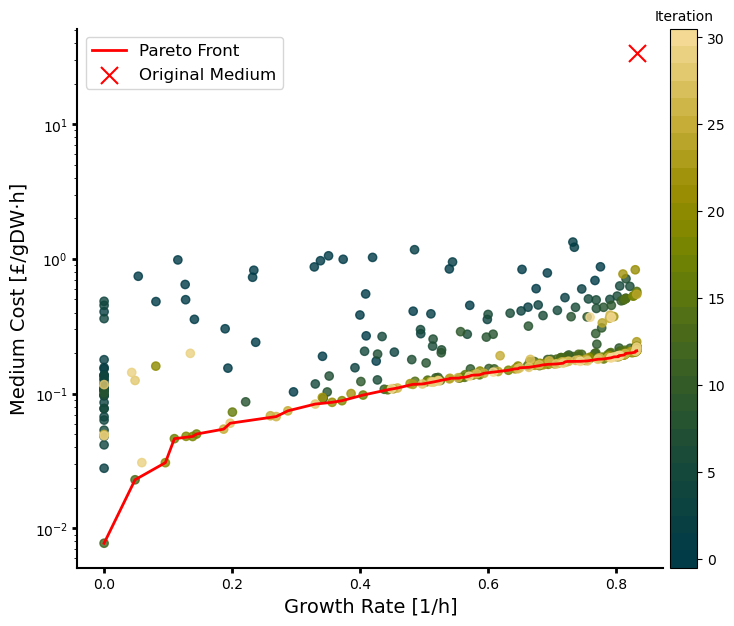

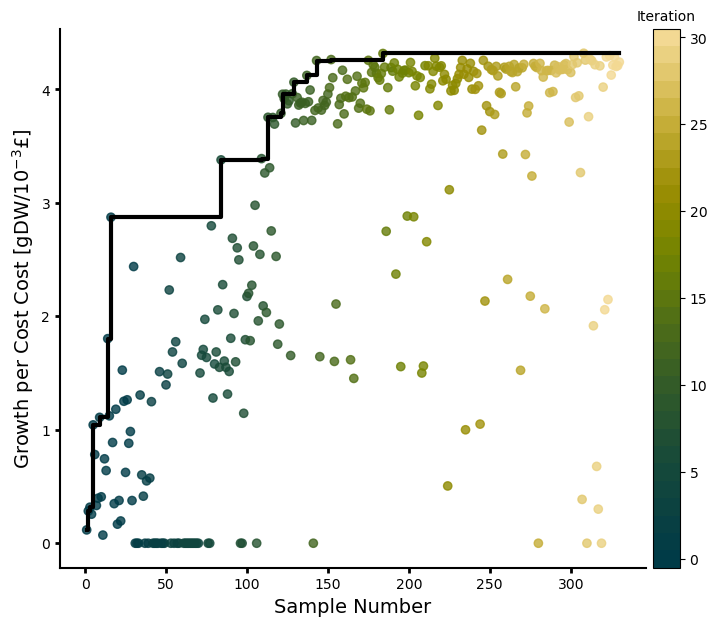

In [39]:
medium_textbook["EX_o2_e"] = 20
filename = "2025-04-07//2025-04-07_BayesOpt_textbook_growth-cost_qPAREGO_30it_round_1"
results_textbook = JSON_deserialize_load_results((filename + ".json"), model_textbook)
model_textbook.medium = medium_textbook
print(model_textbook.slim_optimize())

plot_pareto_batch_colour(
    results = results_textbook,
    figname = (filename + "_pareto_batch_colour.png"),
    MetModel = model_textbook,
    initial_medium = medium_textbook,
    initial_costs = costs_textbook
)
plot_growth_per_cost(
    results = results_textbook,
    figname = (filename + "_growth-per-cost.png")
)

## iML1515

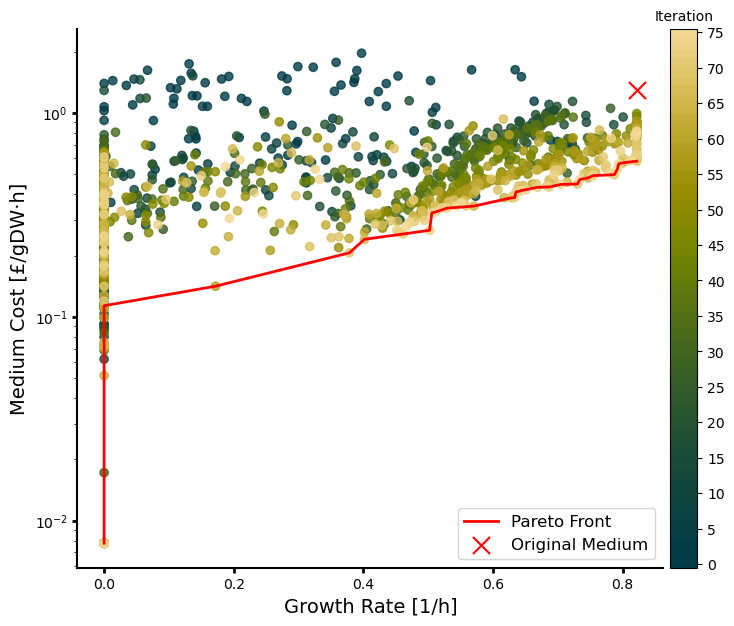

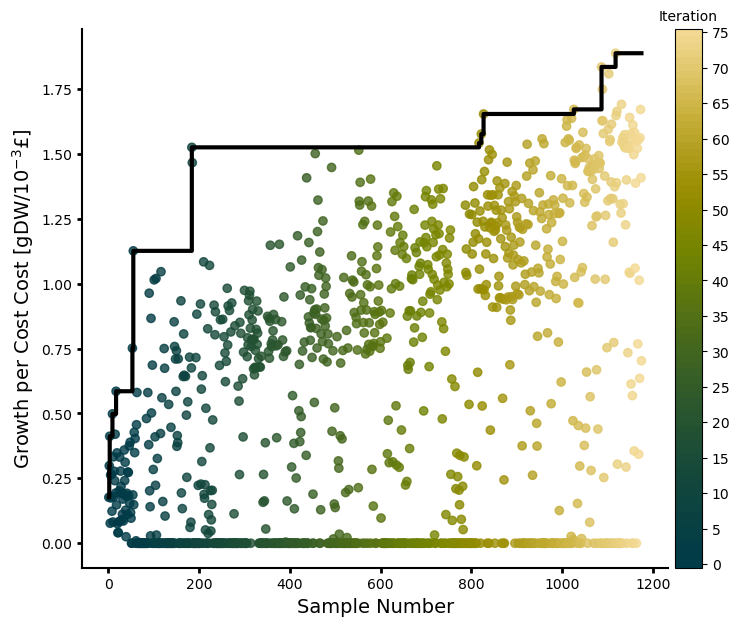

In [40]:
filename = "2025-04-10//2025-04-10_BayesOpt_iML1515_growth-cost_qPAREGO_75it_round_1"
results_iML1515 = JSON_deserialize_load_results((filename + ".json"), model_iML1515)
model_iML1515.medium = medium_iJO1366_reduced

plot_pareto_batch_colour(
    results = results_iML1515,
    figname = (filename + "_pareto_batch_colour.png"),
    MetModel = model_iML1515,
    initial_medium = medium_iJO1366_reduced,
    initial_costs = costs_iJO1366_reduced
)
plot_growth_per_cost(
    results = results_iML1515,
    figname = (filename + "_growth-per-cost.png")
)

## iJO1366

In [10]:
#protein_rxn = model_iJO1366_antiEpEX_scFv.reactions.get_by_id("Recombinant_protein")
#biomass_rxn = model_iJO1366_antiEpEX_scFv.reactions.get_by_id("BIOMASS_Ec_iJO1366_core_53p95M")

biomass_rxn_id = "BIOMASS_Ec_iJO1366_core_53p95M"
protein_rxn_id = "Recombinant_protein"

# bounds of biomass reaction
biomass_rxn.bounds = (0.0, 0.85)
# define objective as combination of growth (biomass) and production
factor_bio = 0.99
factor_prot = 1-factor_bio
combined_objective = model_iJO1366_antiEpEX_scFv.problem.Objective(
    factor_bio * model_iJO1366_antiEpEX_scFv.reactions.BIOMASS_Ec_iJO1366_core_53p95M.flux_expression + 
    factor_prot * model_iJO1366_antiEpEX_scFv.reactions.Recombinant_protein.flux_expression,
    direction = 'max')
model_iJO1366_antiEpEX_scFv.objective = combined_objective
print(model_iJO1366_antiEpEX_scFv.objective)

Maximize
0.99*BIOMASS_Ec_iJO1366_core_53p95M - 0.99*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1 + 0.01*Recombinant_protein - 0.01*Recombinant_protein_reverse_7ae2f


### growth-cost

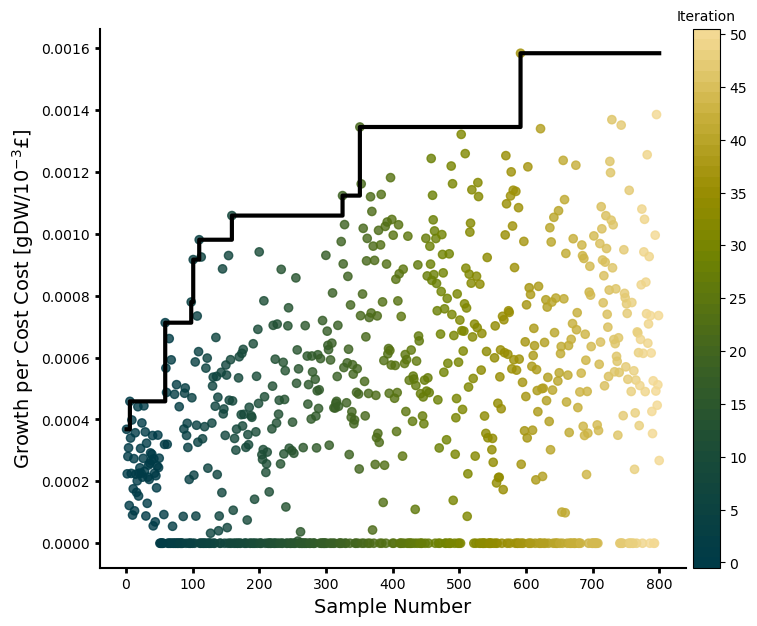

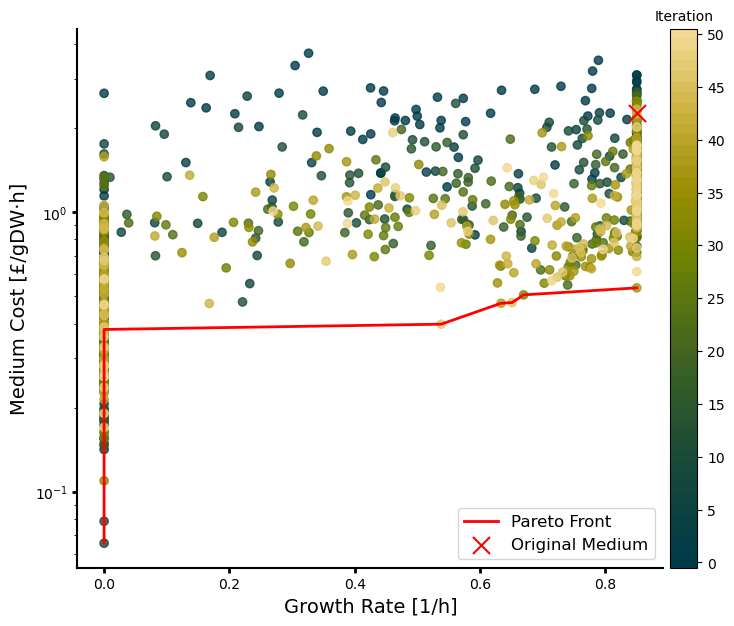

In [37]:
filename = "2025-04-07//2025-04-07_BayesOpt_iJO1366_antiEpEX_scFv_growth-cost_qPAREGO_50it_round_1"
resultname = "2025-04-07//2025-04-07_BayesOpt_iJO1366_antiEpEX_scFv_gc"
results_iJO1366_gc = JSON_deserialize_load_results(
    (filename + ".json"), 
    model_iJO1366_antiEpEX_scFv)

model_iJO1366_antiEpEX_scFv.medium = medium_iJO1366_enriched

plot_growth_per_cost(results_iJO1366_gc, (resultname + "_growth-per-cost.png"))
plot_pareto_batch_colour(
    results_iJO1366_gc,
    figname = (resultname + "_pareto.png"),
    MetModel = model_iJO1366_antiEpEX_scFv,
    initial_medium = medium_iJO1366_enriched,
    initial_costs = costs_iJO1366_enriched,
    model_objective = combined_objective
    ) 

### growth-production

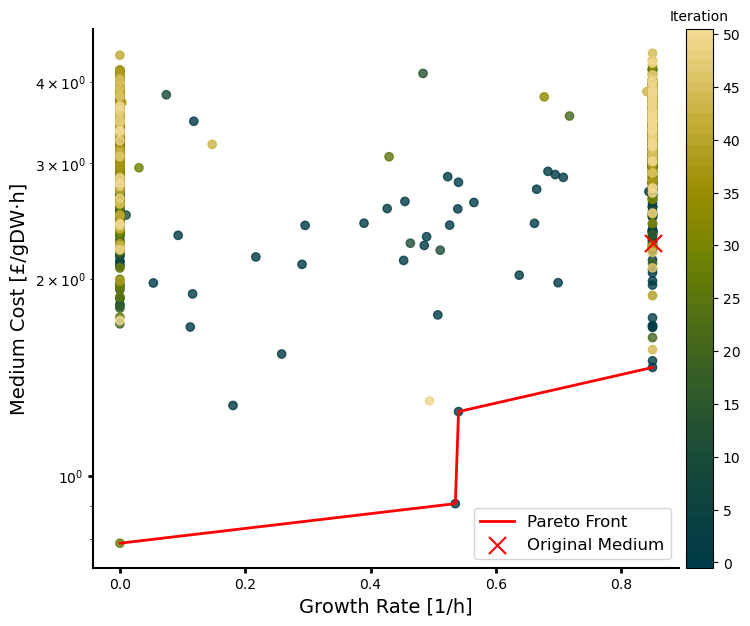

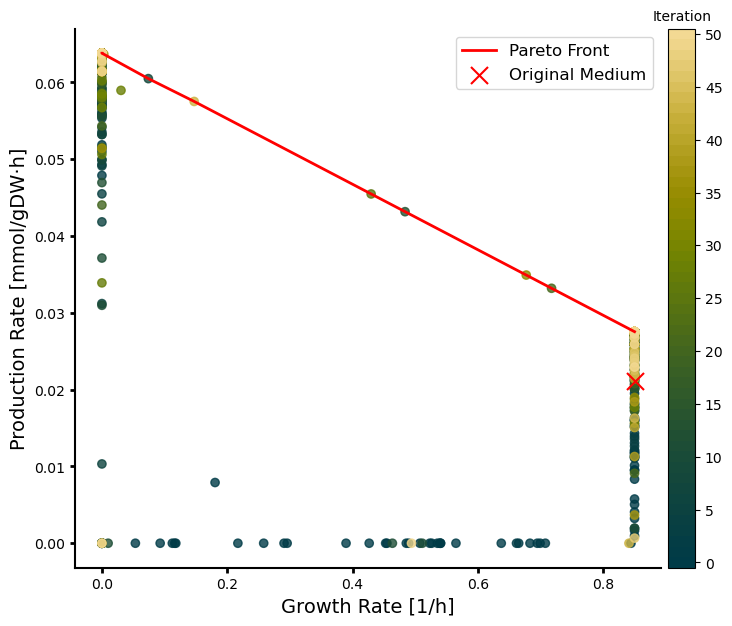

In [38]:
filename = "2025-04-07//2025-04-07_BayesOpt_iJO1366_antiEpEX_scFv_growth-production_qPAREGO_50it_round_1"
resultname = "2025-04-07//2025-04-07_BayesOpt_iJO1366_antiEpEX_scFv_gp"
results_iJO1366_gp = JSON_deserialize_load_results(
    (filename + ".json"), 
    model_iJO1366_antiEpEX_scFv)

model_iJO1366_antiEpEX_scFv.medium = medium_iJO1366_enriched

plot_pareto_batch_colour(
    results_iJO1366_gp,
    xax = "growth rate tensors", 
    yax = "cost tensors",
    figname = (resultname + "_pareto-gc.png"),
    MetModel = model_iJO1366_antiEpEX_scFv,
    initial_medium = medium_iJO1366_enriched,
    initial_costs = costs_iJO1366_enriched,
    model_objective = combined_objective
    )
plot_pareto_batch_colour(
    results_iJO1366_gp,
    xax = "growth rate tensors", 
    yax = "production tensors",
    figname = (resultname + "_pareto-gp.png"),
    MetModel = model_iJO1366_antiEpEX_scFv,
    initial_medium = medium_iJO1366_enriched,
    initial_costs = costs_iJO1366_enriched,
    model_objective = combined_objective
    )

### production-cost

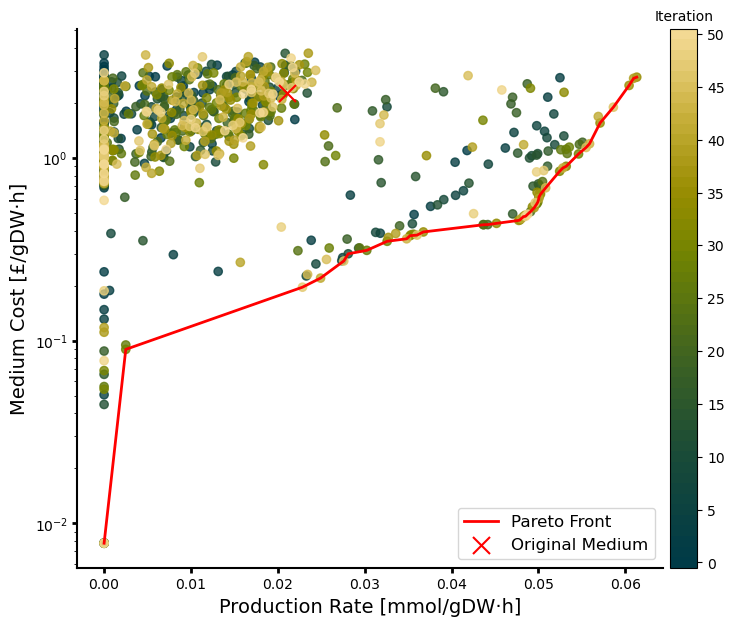

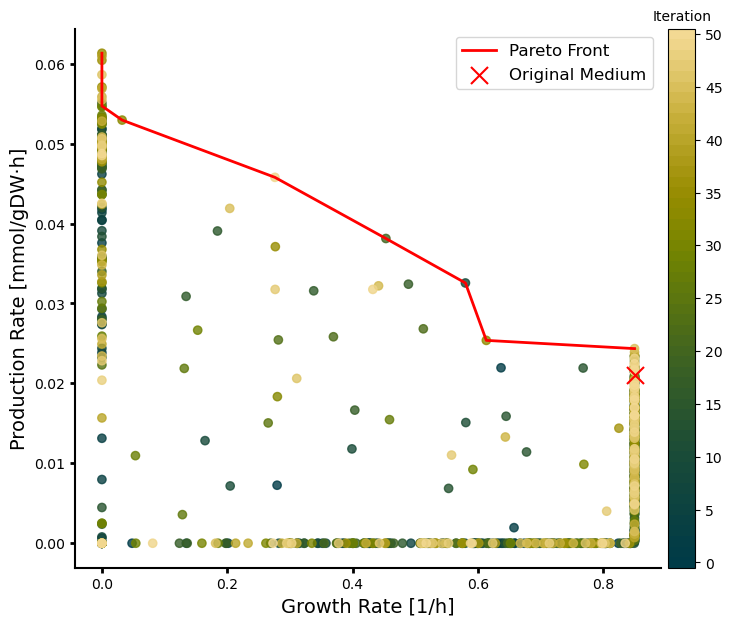

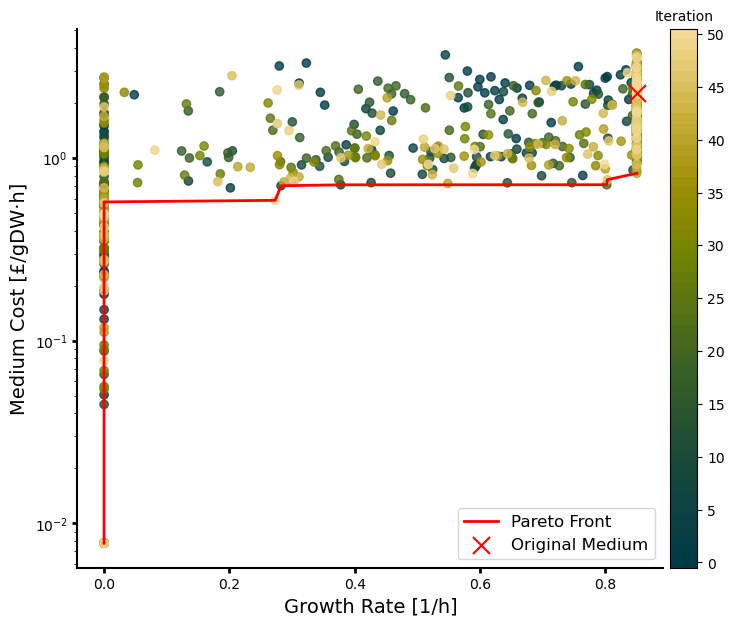

In [41]:
filename = "2025-04-07//2025-04-07_BayesOpt_iJO1366_antiEpEX_scFv_production-cost_qPAREGO_50it_round_1"
resultname = "2025-04-07//2025-04-07_BayesOpt_iJO1366_antiEpEX_scFv_pc"
results_iJO1366_pc = JSON_deserialize_load_results(
    (filename + ".json"), 
    model_iJO1366_antiEpEX_scFv)

model_iJO1366_antiEpEX_scFv.medium = medium_iJO1366_enriched

plot_pareto_batch_colour(
    results_iJO1366_pc,
    xax = "production tensors", 
    yax = "cost tensors",
    figname = (resultname + "_pareto_pc.png"),
    MetModel = model_iJO1366_antiEpEX_scFv,
    initial_medium = medium_iJO1366_enriched,
    initial_costs = costs_iJO1366_enriched,
    model_objective = combined_objective
    )
plot_pareto_batch_colour(
    results_iJO1366_pc,
    xax = "growth rate tensors", 
    yax = "production tensors",
    figname = (resultname + "_pareto-gp.png"),
    MetModel = model_iJO1366_antiEpEX_scFv,
    initial_medium = medium_iJO1366_enriched,
    initial_costs = costs_iJO1366_enriched,
    model_objective = combined_objective
    )


filename = "2025-04-07//2025-04-07_BayesOpt_iJO1366_antiEpEX_scFv_production-cost_qPAREGO_50it_round_1"
resultname = "2025-04-07//2025-04-07_BayesOpt_iJO1366_antiEpEX_scFv_pc"
results_iJO1366_pc = JSON_deserialize_load_results(
    (filename + ".json"), 
    model_iJO1366_antiEpEX_scFv)

model_iJO1366_antiEpEX_scFv.medium = medium_iJO1366_enriched

plot_pareto_batch_colour(
    results_iJO1366_pc,
    xax = "growth rate tensors", 
    yax = "cost tensors",
    figname = (resultname + "_pareto-gc.png"),
    MetModel = model_iJO1366_antiEpEX_scFv,
    initial_medium = medium_iJO1366_enriched,
    initial_costs = costs_iJO1366_enriched,
    model_objective = combined_objective
    )


### growth-production-cost

#### 2025-04-07

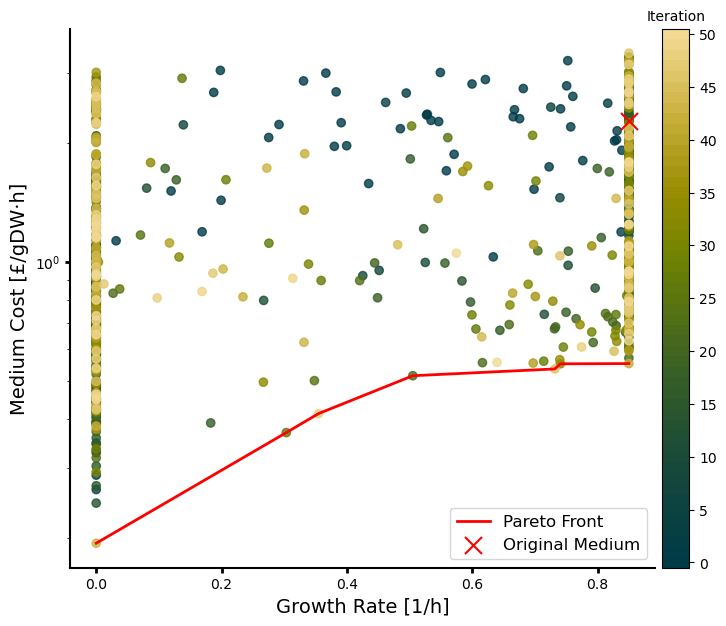

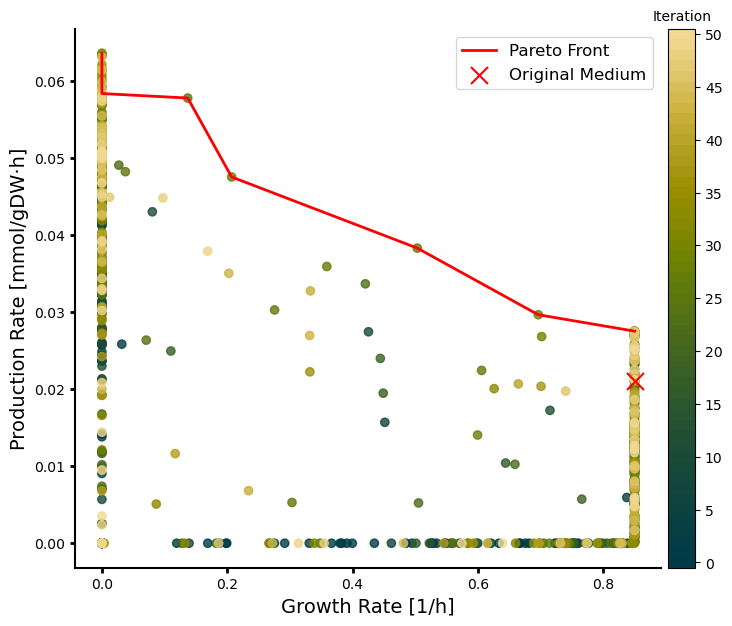

In [57]:
filename = "2025-04-07//2025-04-07_BayesOpt_iJO1366_antiEpEX_scFv_growth-production-cost_qPAREGO_50it_round_1"
resultname = "2025-04-07//2025-04-07_BayesOpt_iJO1366_antiEpEX_scFv_gpc"
results_iJO1366_gpc = JSON_deserialize_load_results(
    (filename + ".json"), 
    model_iJO1366_antiEpEX_scFv)

model_iJO1366_antiEpEX_scFv.medium = medium_iJO1366_enriched    

# plot all results
plot_pareto_batch_colour(
    results_iJO1366_gpc,
    xax = "growth rate tensors", 
    yax = "cost tensors",
    figname = (resultname + "_pareto-gc.png"),
    MetModel = model_iJO1366_antiEpEX_scFv,
    initial_medium = medium_iJO1366_enriched,
    initial_costs = costs_iJO1366_enriched,
    model_objective = combined_objective
    )

plot_pareto_batch_colour(
    results_iJO1366_gpc,
    xax = "growth rate tensors",
    yax = "production tensors",
    figname = (resultname + "_pareto-gp.png"),
    MetModel = model_iJO1366_antiEpEX_scFv,
    initial_medium = medium_iJO1366_enriched,
    initial_costs = costs_iJO1366_enriched,
    model_objective = combined_objective
    )


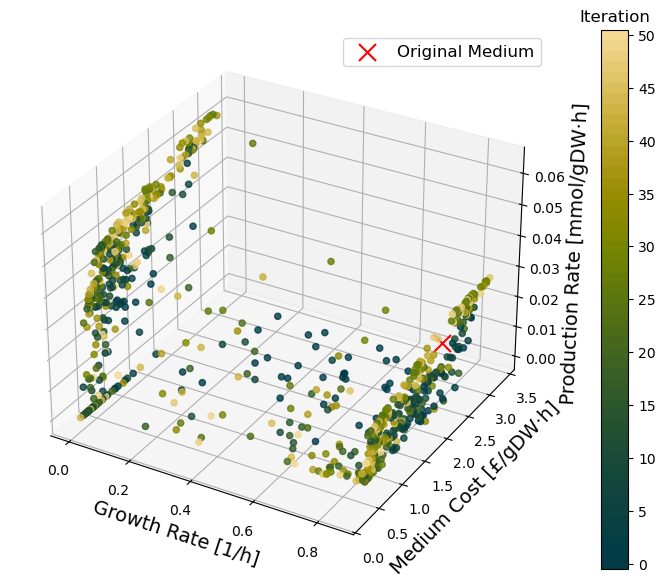

In [76]:
filename = "2025-04-07//2025-04-07_BayesOpt_iJO1366_antiEpEX_scFv_growth-production-cost_qPAREGO_50it_round_1"
resultname = "2025-04-07//2025-04-07_BayesOpt_iJO1366_antiEpEX_scFv_gpc"
results_iJO1366_gpc = JSON_deserialize_load_results(
    (filename + ".json"), 
    model_iJO1366_antiEpEX_scFv)

model_iJO1366_antiEpEX_scFv.medium = medium_iJO1366_enriched 
    
plot_3D(
    results_iJO1366_gpc,
    xax = "growth rate tensors", 
    yax = "cost tensors", 
    zax = "production tensors",
    figname = (resultname + "_3D.png"),
    MetModel = model_iJO1366_antiEpEX_scFv, 
    initial_medium = medium_iJO1366_enriched,
    initial_costs = costs_iJO1366_enriched,
    model_objective = combined_objective
    )


In [ ]:
filename = "2025-04-07//2025-04-07_BayesOpt_iJO1366_antiEpEX_scFv_growth-production-cost_qPAREGO_50it_round_1"
resultname = "2025-04-07//2025-04-07_BayesOpt_iJO1366_antiEpEX_scFv_gpc"
results_iJO1366_gpc = JSON_deserialize_load_results(
    (filename + ".json"), 
    model_iJO1366_antiEpEX_scFv)

model_iJO1366_antiEpEX_scFv.medium = medium_iJO1366_enriched 

# plot subset of results where production > 0.01 and growth > 0.5
plot_production_per_cost_coloured_by_growth(
    results_iJO1366_gpc,
    figname = (resultname + "_best_coloured-by-growth.png"),
    growth_threshold = 0.5,
    production_threshold = 0.01,
    MetModel = model_iJO1366_antiEpEX_scFv,
    initial_medium = medium_iJO1366_enriched,
    initial_costs = costs_iJO1366_enriched,
    model_objective = combined_objective
    )


filename = "2025-04-07//2025-04-07_BayesOpt_iJO1366_antiEpEX_scFv_growth-production-cost_qPAREGO_50it_round_1"
resultname = "2025-04-07//2025-04-07_BayesOpt_iJO1366_antiEpEX_scFv_gpc"
results_iJO1366_gpc = JSON_deserialize_load_results(
    (filename + ".json"), 
    model_iJO1366_antiEpEX_scFv)

model_iJO1366_antiEpEX_scFv.medium = medium_iJO1366_enriched 
# plot subset of results where production > 0.01 and growth doesn't matter
plot_production_per_cost_coloured_by_growth(
    results_iJO1366_gpc,
    figname = (resultname + "_best-production_coloured-by-growth.png"),
    growth_threshold = 0.0,
    production_threshold = 0.01,
    MetModel = model_iJO1366_antiEpEX_scFv,
    initial_medium = medium_iJO1366_enriched,
    initial_costs = costs_iJO1366_enriched,
    model_objective = combined_objective
    )


#### 2024-11-19

In [93]:
# Plotting functions to be used across notebooks
%run Plotting_MOBO_II.ipynb

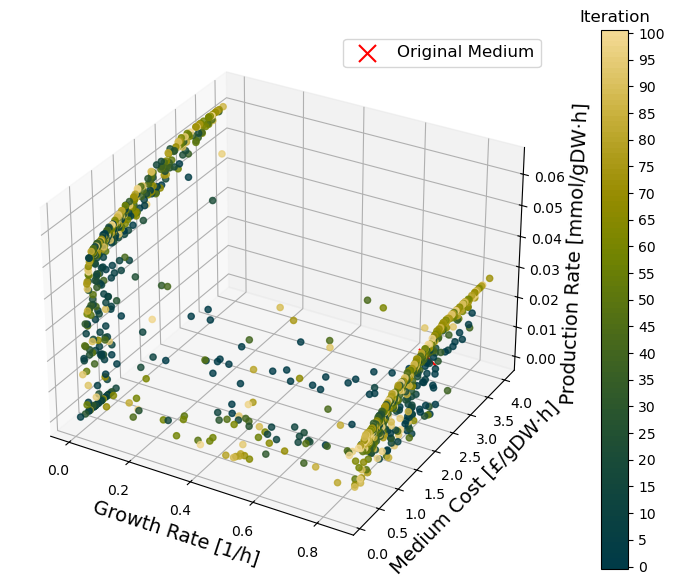

In [96]:
filename = "2024-11-19//2024-11-19_BayesOpt_iJO1366_antiEpEX_scFv_growth-production-cost_qNEHVI_100it_round_4"
resultname = "2024-11-19//2024-11-19_BayesOpt_iJO1366_antiEpEX_scFv_gpc"
results_iJO1366_gpc = JSON_deserialize_load_results(
    (filename + ".json"), 
    model_iJO1366_antiEpEX_scFv)

model_iJO1366_antiEpEX_scFv.medium = medium_iJO1366_enriched 

# data does not have n_iter, n_start, n_candidates -> needs to be set explicitly   
plot_3D(
    results_iJO1366_gpc,
    xax = "growth rate tensors", 
    yax = "cost tensors", 
    zax = "production tensors",
    figname = (resultname + "_3D.png"),
    MetModel = model_iJO1366_antiEpEX_scFv, 
    initial_medium = medium_iJO1366_enriched,
    initial_costs = costs_iJO1366_enriched,
    model_objective = combined_objective
    )


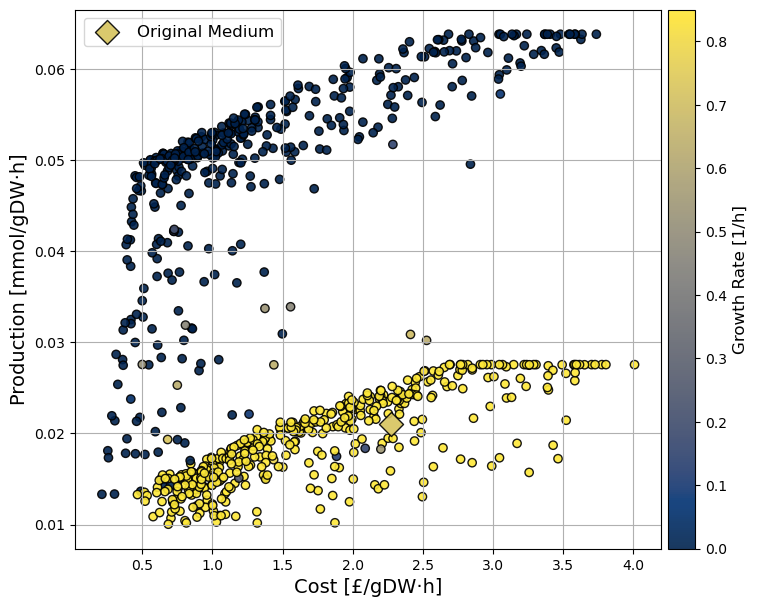

In [95]:
filename = "2024-11-19//2024-11-19_BayesOpt_iJO1366_antiEpEX_scFv_growth-production-cost_qNEHVI_100it_round_4"
resultname = "2024-11-19//2024-11-19_BayesOpt_iJO1366_antiEpEX_scFv_gpc"
results_iJO1366_gpc = JSON_deserialize_load_results(
    (filename + ".json"), 
    model_iJO1366_antiEpEX_scFv)

model_iJO1366_antiEpEX_scFv.medium = medium_iJO1366_enriched 
# plot subset of results where production > 0.01 and growth doesn't matter
plot_production_per_cost_coloured_by_growth(
    results_iJO1366_gpc,
    figname = (resultname + "_best-production_coloured-by-growth.png"),
    growth_threshold = 0.0,
    production_threshold = 0.01,
    MetModel = model_iJO1366_antiEpEX_scFv,
    initial_medium = medium_iJO1366_enriched,
    initial_costs = costs_iJO1366_enriched,
    model_objective = combined_objective
    )